# XGBoost 순정 모델 테스트

In [13]:
import pandas as pd

## 데이터 로드

In [14]:
X_data = pd.read_csv("../../data/X_data.csv", index_col=0)
y_data = pd.read_csv("../../data/y_data.csv", index_col=0)

In [15]:
X_data.head()

,Runtime,Weekly Views,n_score,g_score,ky_chart_on,KoreanMovies,Dance,Indie,Trot,J-POP,...,Ballad,Soul,Rock,Pop,season_autumn,season_spring,season_summer,season_winter,Previous_Rank,New_Rank
0,-0.733963,2.119452,0.942971,1.00,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0.000,False
1,-0.077307,2.119452,0.942971,1.00,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.010,False
2,-1.390619,2.047278,0.101924,0.06,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0.015,False
3,-0.628898,0.083618,0.613535,0.45,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0.025,False
4,-1.495684,2.047278,0.101924,0.06,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0.020,False


In [16]:
y_data.head()

,Rank
0,1
1,2
2,4
3,5
4,6


## 학습 데이터, 평가 데이터 분리

In [17]:
X_train, X_test = X_data[:-1000], X_data[-1000:]
y_train, y_test = y_data[:-1000], y_data[-1000:]

In [18]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [19]:
X_train.head()

,Runtime,Weekly Views,n_score,g_score,ky_chart_on,KoreanMovies,Dance,Indie,Trot,J-POP,...,Ballad,Soul,Rock,Pop,season_autumn,season_spring,season_summer,season_winter,Previous_Rank,New_Rank
0,-0.733963,2.119452,0.942971,1.00,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0.000,False
1,-0.077307,2.119452,0.942971,1.00,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.010,False
2,-1.390619,2.047278,0.101924,0.06,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0.015,False
3,-0.628898,0.083618,0.613535,0.45,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0.025,False
4,-1.495684,2.047278,0.101924,0.06,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0.020,False


In [20]:
y_train.head()

,Rank
0,1
1,2
2,4
3,5
4,6


#

## 모델 구현

In [21]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb.fit(X_train, y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:42.84460	validation_1-rmse:44.28489
[1]	validation_0-rmse:32.95124	validation_1-rmse:34.34593
[2]	validation_0-rmse:26.66755	validation_1-rmse:28.08610
[3]	validation_0-rmse:22.90329	validation_1-rmse:24.51194
[4]	validation_0-rmse:20.53615	validation_1-rmse:22.41199
[5]	validation_0-rmse:19.23505	validation_1-rmse:21.18652
[6]	validation_0-rmse:18.41471	validation_1-rmse:20.63932
[7]	validation_0-rmse:17.89022	validation_1-rmse:20.19728
[8]	validation_0-rmse:17.49408	validation_1-rmse:20.04298
[9]	validation_0-rmse:17.04754	validation_1-rmse:19.93398
[10]	validation_0-rmse:16.86011	validation_1-rmse:19.89126
[11]	validation_0-rmse:16.58691	validation_1-rmse:19.75955
[12]	validation_0-rmse:16.35740	validation_1-rmse:19.69546
[13]	validation_0-rmse:16.22353	validation_1-rmse:19.78318
[14]	validation_0-rmse:16.10737	validation_1-rmse:19.77624
[15]	validation_0-rmse:15.96265	validation_1-rmse:19.74035
[16]	validation_0-rmse:15.91938	validation_1-rmse:19.74665
[17]	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## 평가 지표 도출

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 예측
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# 평가 지표 계산
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))  # RMSE
train_r2 = r2_score(y_train, y_train_pred)  # R²
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))  # RMSE
test_r2 = r2_score(y_test, y_test_pred)  # R²

print("=== 학습 데이터 평가 지표 ===")
print(f"RMSE: {train_rmse:.2f}")
print(f"R²: {train_r2:.2f}")
print("=== 테스트 데이터 평가 지표 ===")
print(f"RMSE: {test_rmse:.2f}")
print(f"R²: {test_r2:.2f}")

=== 학습 데이터 평가 지표 ===
RMSE: 8.76
R²: 0.98
=== 테스트 데이터 평가 지표 ===
RMSE: 20.30
R²: 0.88


## 실제값과 예측값 시각화

In [23]:
import matplotlib.pyplot as plt

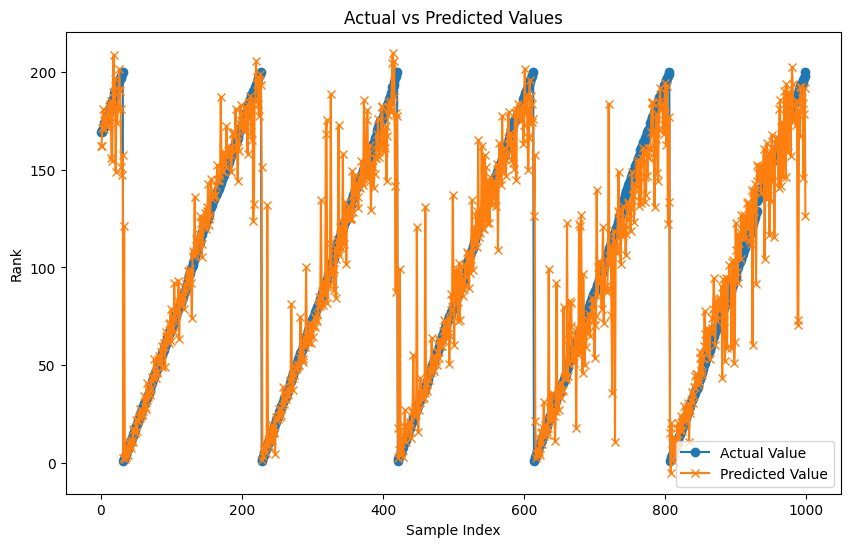

In [24]:
# 모델 예측값과 실제값 비교 그래프
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Value', marker='o')
plt.plot(pd.DataFrame(y_test_pred), label='Predicted Value', marker='x') # 예측값은 numpy 배열이라서 데이터프레임화 해줘야 제대로 나옴
plt.xlabel('Sample Index')
plt.ylabel('Rank')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

## 튜닝 개시

In [32]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param = {
    'eta':[0.1, 0.3, 0.5],
    'min_child_weight':[0, 10, 100],
    'gamma':[0, 1, 10],
    'max_depth':[3, 5, 7],
    'subsample':[0.6, 0.8, 1.0],
    'lambda':[0, 1],
    'alpha':[0, 1]
}

grid_cv = GridSearchCV(xgb, param_grid=param, scoring='neg_root_mean_squared_error', cv=2, verbose=1, n_jobs=-1)
grid_cv.fit(X_train, y_train, eval_set=[(X_test, y_test)])

print('최적 파라미터 :', grid_cv.best_params_)
print('최고 예측 정확도 :', grid_cv.best_score_)

Fitting 2 folds for each of 972 candidates, totalling 1944 fits


c:\itbank\project3\workspace\venv\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[0]	validation_0-rmse:54.62145
[1]	validation_0-rmse:50.28386
[2]	validation_0-rmse:46.49805
[3]	validation_0-rmse:43.03216
[4]	validation_0-rmse:39.98310
[5]	validation_0-rmse:37.35218
[6]	validation_0-rmse:35.02286
[7]	validation_0-rmse:32.97033
[8]	validation_0-rmse:31.21043
[9]	validation_0-rmse:29.64881
[10]	validation_0-rmse:28.32985
[11]	validation_0-rmse:27.16834
[12]	validation_0-rmse:26.18423
[13]	validation_0-rmse:25.39254
[14]	validation_0-rmse:24.66571
[15]	validation_0-rmse:24.04866
[16]	validation_0-rmse:23.52615
[17]	validation_0-rmse:23.01650
[18]	validation_0-rmse:22.62083
[19]	validation_0-rmse:22.37294
[20]	validation_0-rmse:22.07789
[21]	validation_0-rmse:21.82540
[22]	validation_0-rmse:21.62719
[23]	validation_0-rmse:21.35918
[24]	validation_0-rmse:21.17933
[25]	validation_0-rmse:20.97818
[26]	validation_0-rmse:20.87998
[27]	validation_0-rmse:20.77952
[28]	validation_0-rmse:20.70658
[29]	validation_0-rmse:20.64424
[30]	validation_0-rmse:20.57485
[31]	validation_0-

In [33]:
param = {
    'alpha':[0, 0.5],
    'eta':[0.01, 0.1, 0.3],
    'gamma':[0],
    'lambda':[1, 10],
    'max_depth':[1, 3, 5],
    'min_child_weight':[50, 100, 200],
    'subsample':[0.7, 0.8, 0.9],
}

grid_cv = GridSearchCV(xgb, param_grid=param, scoring='neg_root_mean_squared_error', cv=2, verbose=1, n_jobs=-1)
grid_cv.fit(X_train, y_train, eval_set=[(X_test, y_test)])

print('최적 파라미터 :', grid_cv.best_params_)
print('최고 예측 정확도 :', grid_cv.best_score_)

Fitting 2 folds for each of 324 candidates, totalling 648 fits
[0]	validation_0-rmse:54.62145
[1]	validation_0-rmse:50.28386
[2]	validation_0-rmse:46.49805
[3]	validation_0-rmse:43.03216
[4]	validation_0-rmse:39.98310
[5]	validation_0-rmse:37.35218
[6]	validation_0-rmse:35.02286
[7]	validation_0-rmse:32.97033
[8]	validation_0-rmse:31.21043
[9]	validation_0-rmse:29.64881
[10]	validation_0-rmse:28.32985
[11]	validation_0-rmse:27.16834
[12]	validation_0-rmse:26.18423
[13]	validation_0-rmse:25.39254
[14]	validation_0-rmse:24.66571
[15]	validation_0-rmse:24.04866
[16]	validation_0-rmse:23.52615
[17]	validation_0-rmse:23.01650
[18]	validation_0-rmse:22.62083
[19]	validation_0-rmse:22.37294
[20]	validation_0-rmse:22.07789
[21]	validation_0-rmse:21.82540
[22]	validation_0-rmse:21.62719
[23]	validation_0-rmse:21.35918
[24]	validation_0-rmse:21.17933
[25]	validation_0-rmse:20.97818
[26]	validation_0-rmse:20.87998
[27]	validation_0-rmse:20.77952
[28]	validation_0-rmse:20.70658
[29]	validation_0-r

- 정확도 안 바뀌는걸 보니 더 튜닝할 필요 X

## 튜닝 모델 구현

In [34]:
from xgboost import XGBRegressor
xgb = XGBRegressor(alpha=0, eta=0.1, gamma=0, reg_gamma=1, max_depth=3, min_child_weight=100, subsample=0.8)
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb.fit(X_train, y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:53.02964	validation_1-rmse:54.62145
[1]	validation_0-rmse:48.77719	validation_1-rmse:50.28386
[2]	validation_0-rmse:45.06810	validation_1-rmse:46.49805
[3]	validation_0-rmse:41.69552	validation_1-rmse:43.03216
[4]	validation_0-rmse:38.74301	validation_1-rmse:39.98310
[5]	validation_0-rmse:36.18249	validation_1-rmse:37.35218
[6]	validation_0-rmse:33.93129	validation_1-rmse:35.02286
[7]	validation_0-rmse:31.97051	validation_1-rmse:32.97033
[8]	validation_0-rmse:30.29800	validation_1-rmse:31.21043
[9]	validation_0-rmse:28.83534	validation_1-rmse:29.64881
[10]	validation_0-rmse:27.61241	validation_1-rmse:28.32985
[11]	validation_0-rmse:26.54253	validation_1-rmse:27.16834
[12]	validation_0-rmse:25.64571	validation_1-rmse:26.18423
[13]	validation_0-rmse:24.90990	validation_1-rmse:25.39254
[14]	validation_0-rmse:24.25781	validation_1-rmse:24.66571
[15]	validation_0-rmse:23.70949	validation_1-rmse:24.04866
[16]	validation_0-rmse:23.23700	validation_1-rmse:23.52615
[17]	va

c:\itbank\project3\workspace\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:55:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "reg_gamma" } are not used.

  warnings.warn(smsg, UserWarning)


[70]	validation_0-rmse:19.80692	validation_1-rmse:19.39129
[71]	validation_0-rmse:19.79776	validation_1-rmse:19.37819
[72]	validation_0-rmse:19.79166	validation_1-rmse:19.36948
[73]	validation_0-rmse:19.78489	validation_1-rmse:19.38038
[74]	validation_0-rmse:19.76901	validation_1-rmse:19.36925
[75]	validation_0-rmse:19.75891	validation_1-rmse:19.34150
[76]	validation_0-rmse:19.75555	validation_1-rmse:19.33944
[77]	validation_0-rmse:19.74505	validation_1-rmse:19.32841
[78]	validation_0-rmse:19.71876	validation_1-rmse:19.32109
[79]	validation_0-rmse:19.70095	validation_1-rmse:19.27558
[80]	validation_0-rmse:19.67649	validation_1-rmse:19.22927
[81]	validation_0-rmse:19.66319	validation_1-rmse:19.22946
[82]	validation_0-rmse:19.65743	validation_1-rmse:19.22660
[83]	validation_0-rmse:19.64002	validation_1-rmse:19.23077
[84]	validation_0-rmse:19.63285	validation_1-rmse:19.22712
[85]	validation_0-rmse:19.62861	validation_1-rmse:19.23446
[86]	validation_0-rmse:19.62515	validation_1-rmse:19.242

XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=100, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, ...)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 예측
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# 평가 지표 계산
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))  # RMSE
train_r2 = r2_score(y_train, y_train_pred)  # R²
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))  # RMSE
test_r2 = r2_score(y_test, y_test_pred)  # R²

print("=== 학습 데이터 평가 지표 ===")
print(f"RMSE: {train_rmse:.2f}")
print(f"R²: {train_r2:.2f}")
print("=== 테스트 데이터 평가 지표 ===")
print(f"RMSE: {test_rmse:.2f}")
print(f"R²: {test_r2:.2f}")

=== 학습 데이터 평가 지표 ===
RMSE: 19.49
R²: 0.89
=== 테스트 데이터 평가 지표 ===
RMSE: 19.24
R²: 0.90


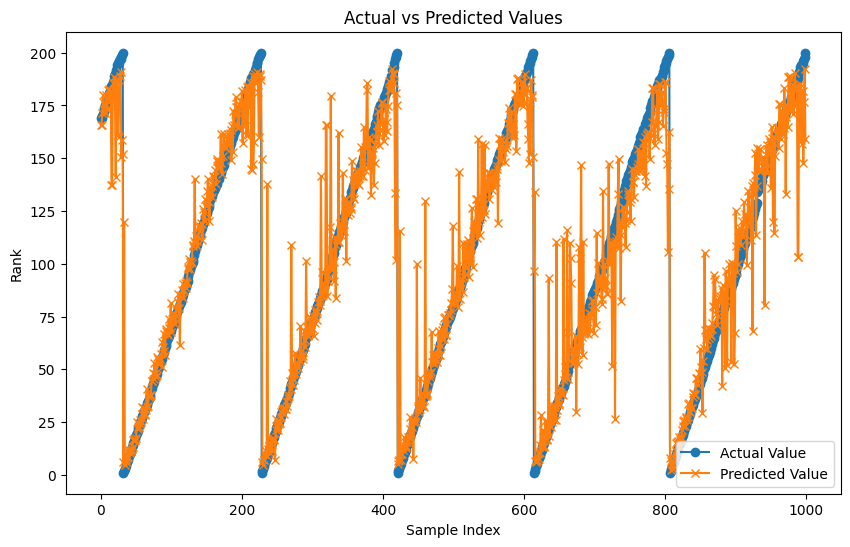

In [36]:
# 모델 예측값과 실제값 비교 그래프
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Value', marker='o')
plt.plot(pd.DataFrame(y_test_pred), label='Predicted Value', marker='x') # 예측값은 numpy 배열이라서 데이터프레임화 해줘야 제대로 나옴
plt.xlabel('Sample Index')
plt.ylabel('Rank')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()